# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>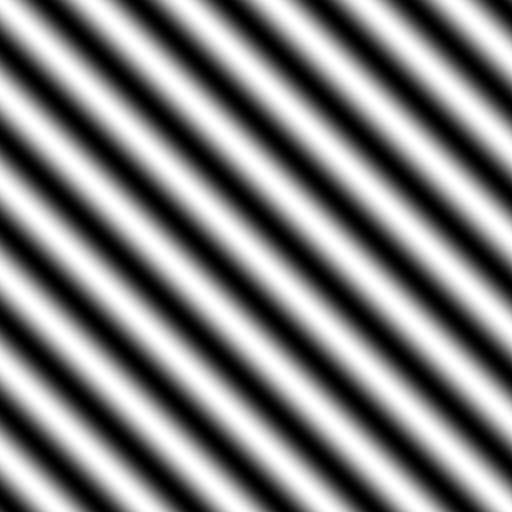</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(toVisualizeFT(If))
    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


<IPython.core.display.Javascript object>


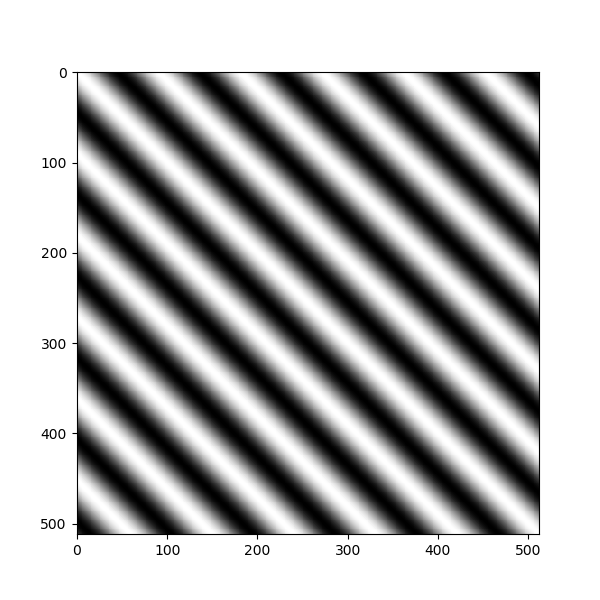

In [2]:
s45_sampled=sinusoid2d(1, 45, 512, 64, 1)
imshow(s45_sampled)

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

sqrt(2)/(2*T0)=0.011 environ

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


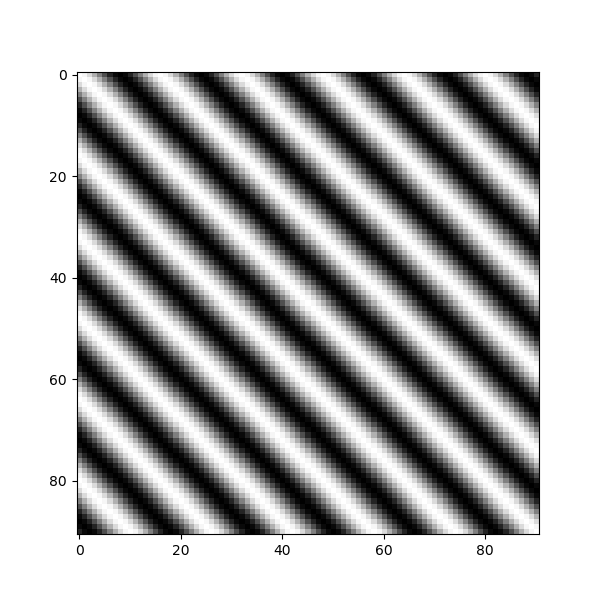

In [3]:
fm = np.sqrt(2)/(2*64)
fe = 16 * fm
Te = 1 / fe
s45_sampled_f16=sinusoid2d(1, 45, 512, 64, Te)
imshow(s45_sampled_f16)

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


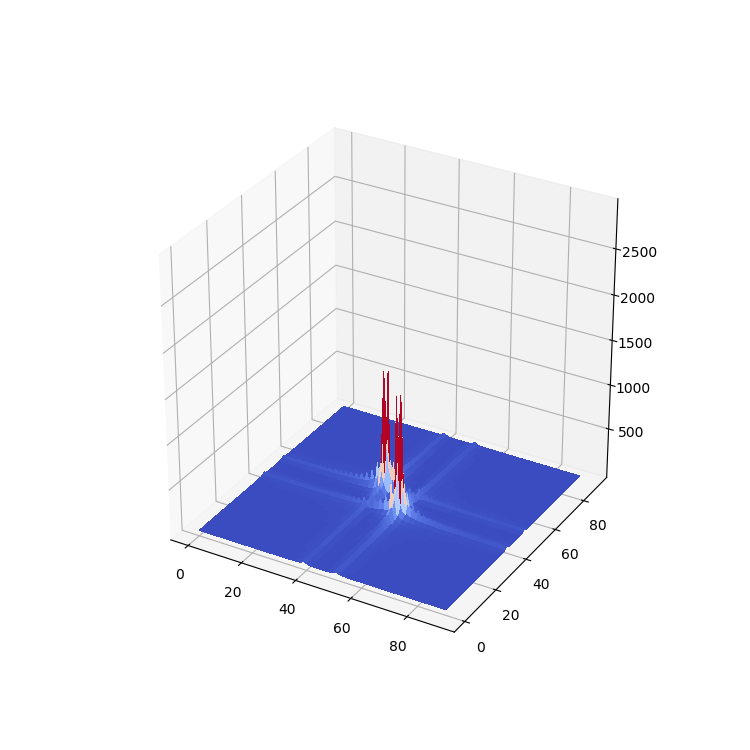

In [4]:
FT_s45_sampled_f16 = computeFT(s45_sampled_f16)
FT_s45_sampled_f16_module = toVisualizeFT(FT_s45_sampled_f16)
surf(FT_s45_sampled_f16_module)

2. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

<IPython.core.display.Javascript object>


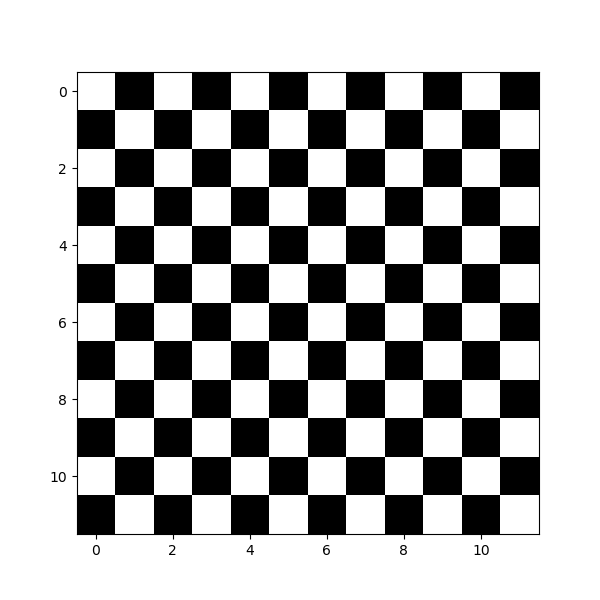

<IPython.core.display.Javascript object>


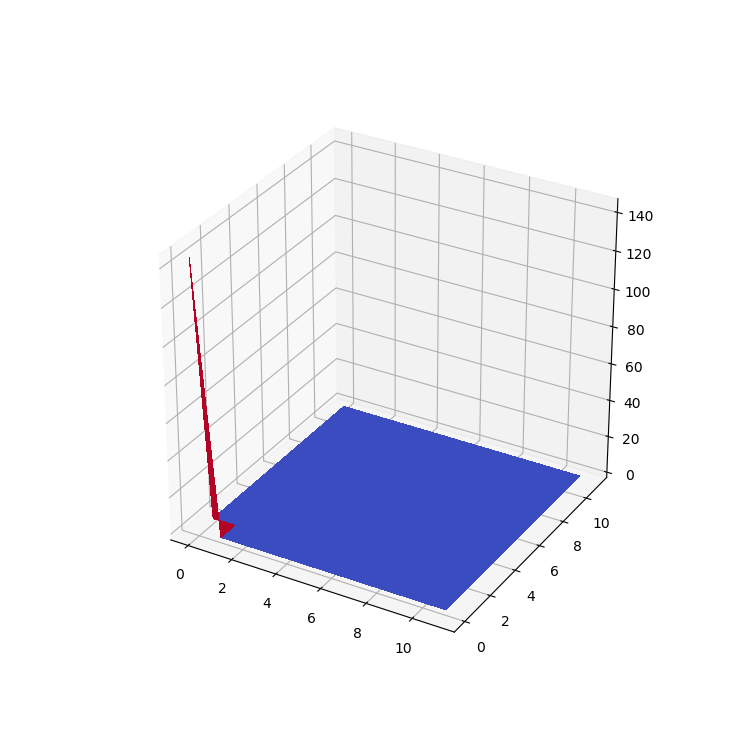

<IPython.core.display.Javascript object>


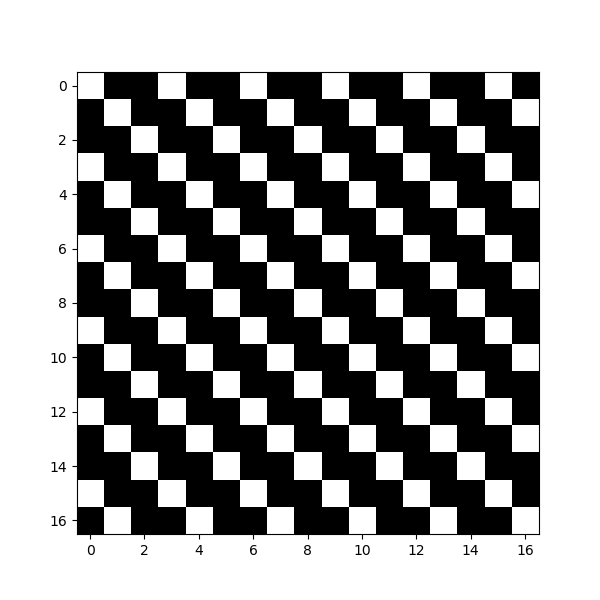

<IPython.core.display.Javascript object>


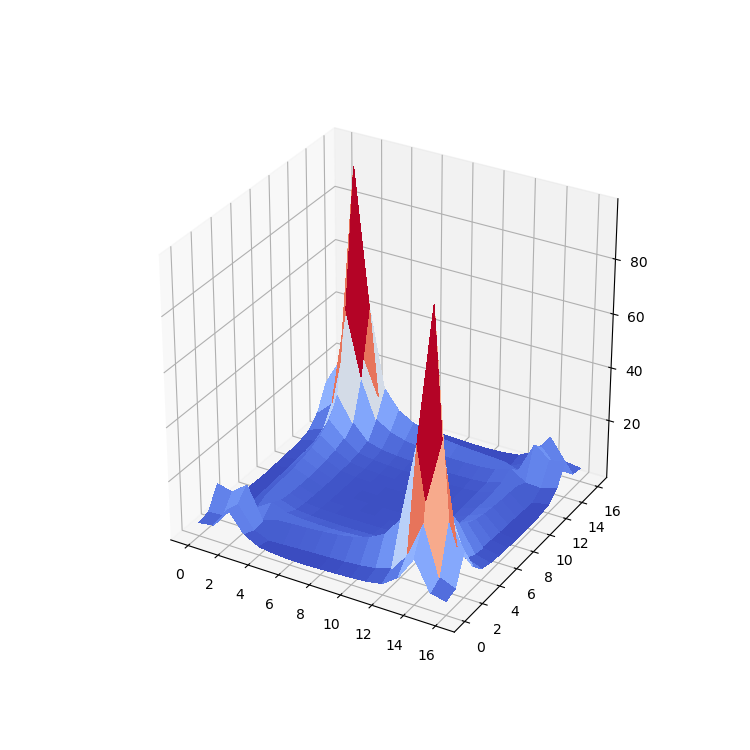

<IPython.core.display.Javascript object>


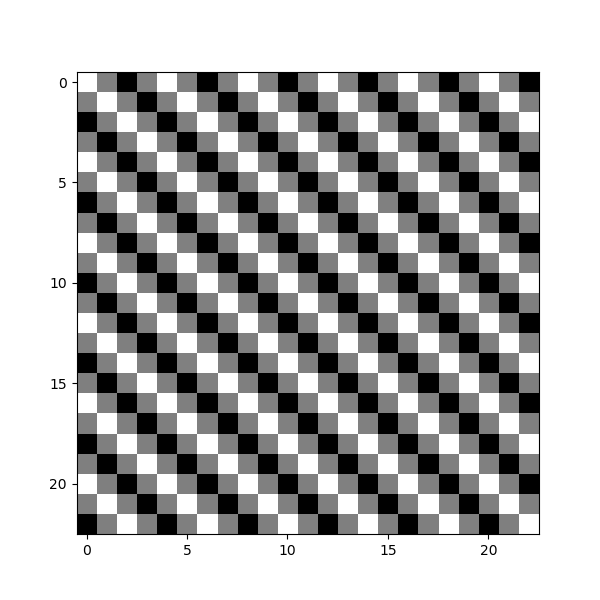

<IPython.core.display.Javascript object>


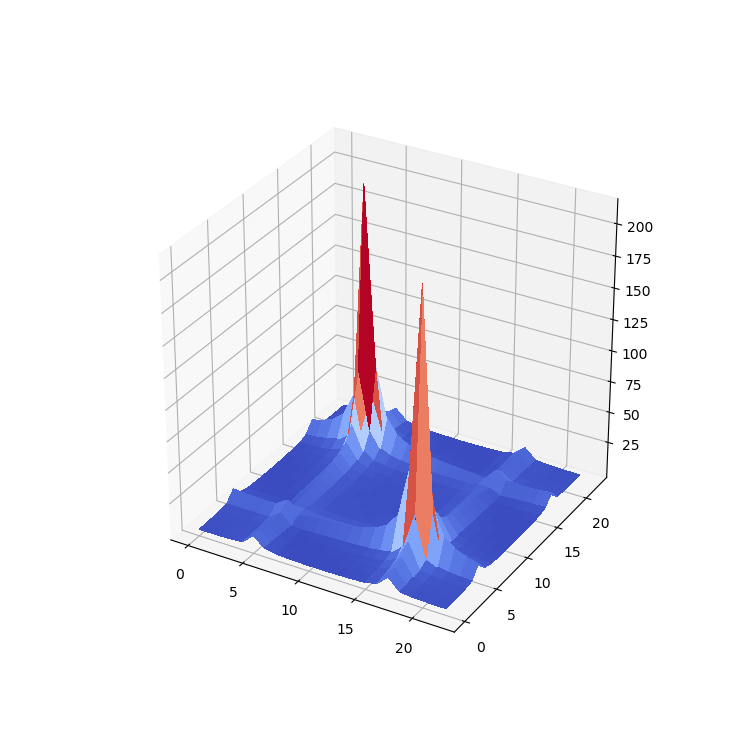

<IPython.core.display.Javascript object>


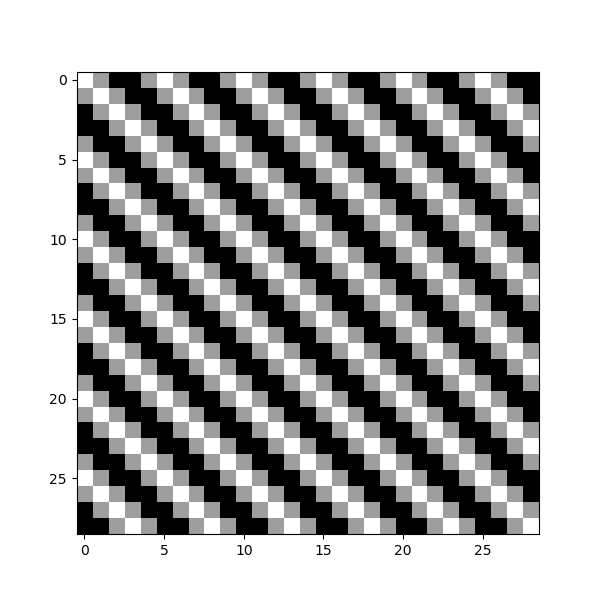

<IPython.core.display.Javascript object>


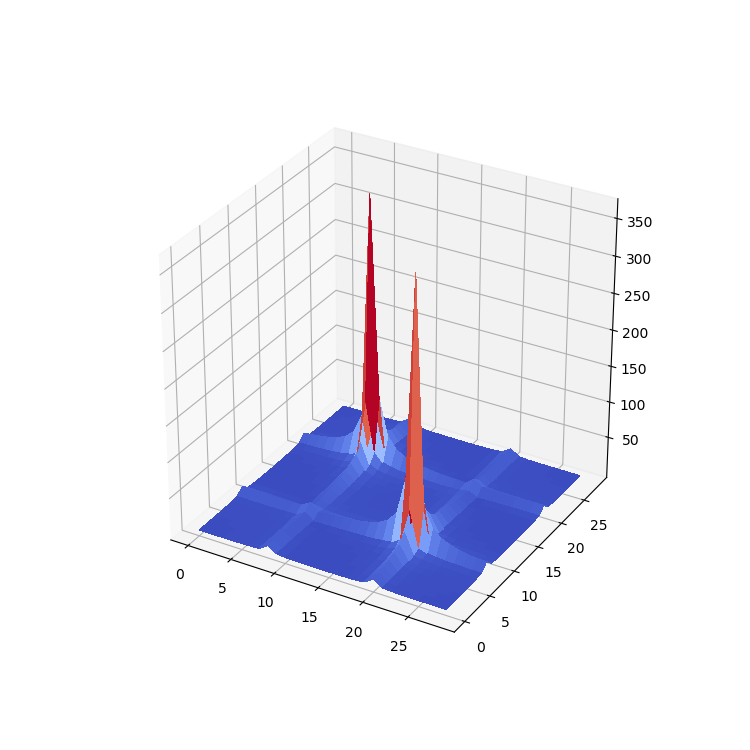

In [5]:
for i in range(2, 6):
    fe = i * fm
    Te = 1/fe
    
    s45_sampled_fe = sinusoid2d(1, 45, 512, 64, Te)
    imshow(s45_sampled_fe)
    
    FT_s45_sampled_fe = computeFT(s45_sampled_fe)
    FT_s45_sampled_fe_module = toVisualizeFT(FT_s45_sampled_fe)
    surf(FT_s45_sampled_fe_module)
    

Pour Te décroissante, on observe que les 2 pics de Dirac se rapprochent, ce qui est tout à fait cohérent car ces derniers sont . Comparé à s45, les pics de diracs obtenus sont beaucoup plus faible.

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


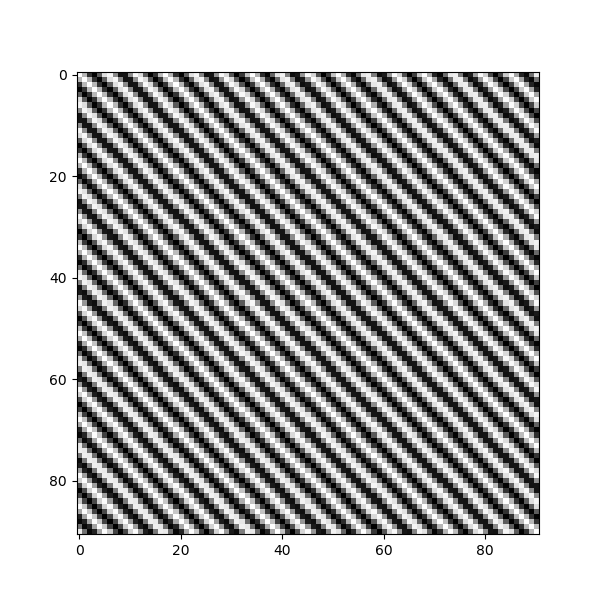

<IPython.core.display.Javascript object>


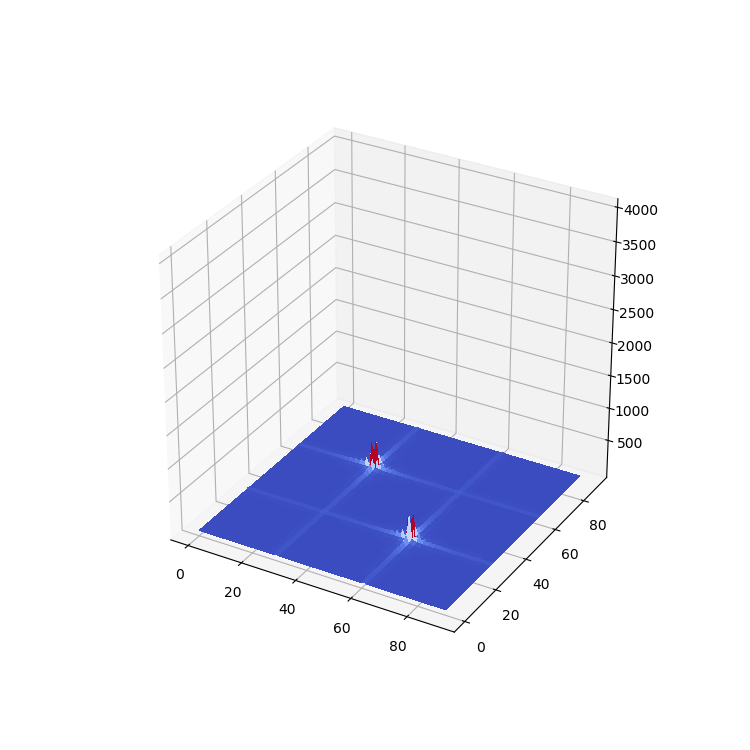

In [6]:
f0 = 4 * fm
T0 = 1 / f0
fe = 16 * fm
Te = 1 / fe

s45_sampled_f0=sinusoid2d(1, 45, 512, T0 , Te)
imshow(s45_sampled_f0)

FT_s45_sampled_f0 = computeFT(s45_sampled_f0)
FT_s45_sampled_f0_module = toVisualizeFT(FT_s45_sampled_f0)
surf(FT_s45_sampled_f0_module)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [7]:
def error(xr,xd,A,L):
    er=1/(2*A*L*L)
    er2=0
    for k in range(L):
        for l in range (L):
            er2+=np.abs(xr[k,l]-xd[k,l])
    return er*er2

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


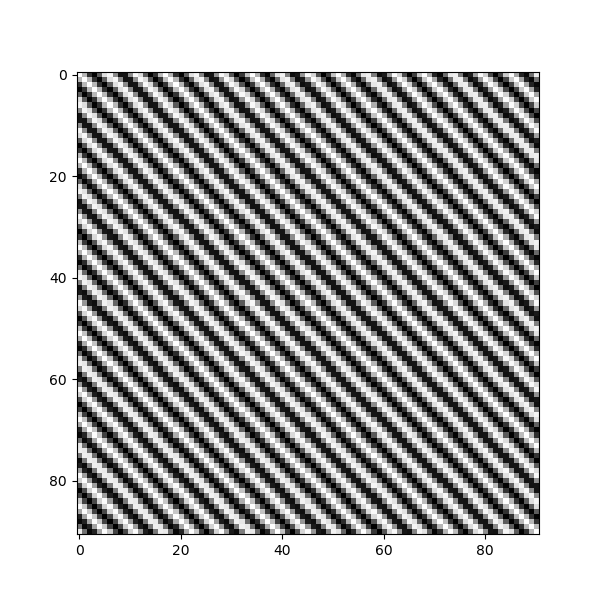

<IPython.core.display.Javascript object>


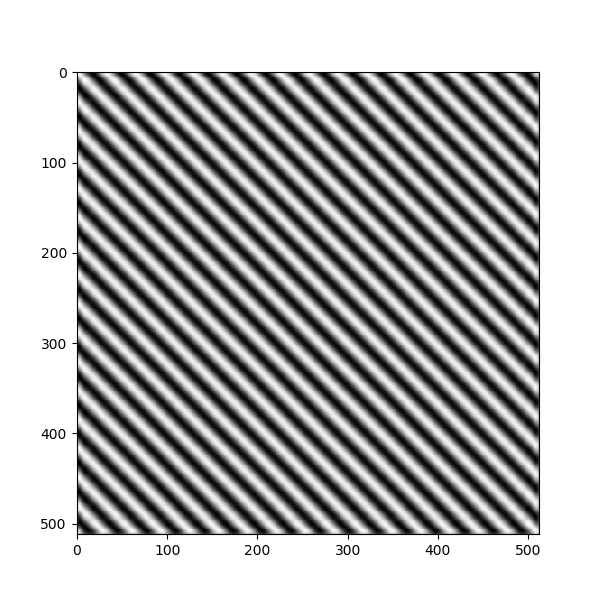

<IPython.core.display.Javascript object>


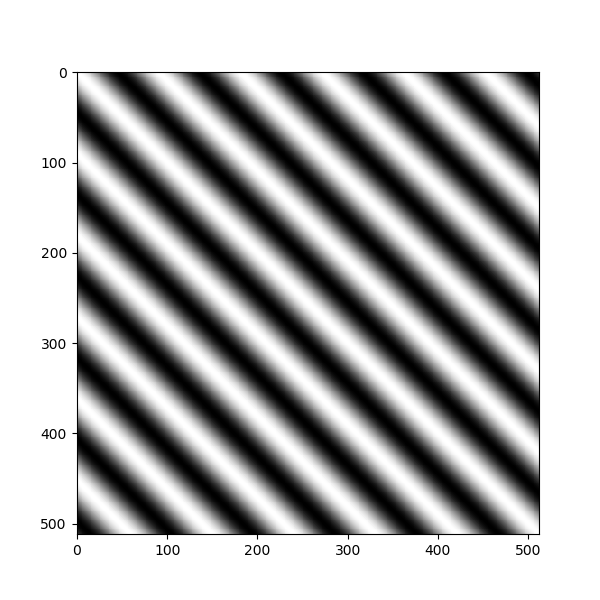

0.40538299036031306


In [8]:
fe = 16 * fm
Te = 1 / fe
xr = shannonInterpolation(s45_sampled_f0, Te, 512) # s45_sampled_f0=sinusoid2d(1, 45, 512, T0 , Te) avec f0=4*fm
xd = s45_sampled    # sinusoid2d(1, 45, 512, 64, 1)
imshow(s45_sampled_f0)
imshow(xr)
imshow(xd)

print(error(xr,xd,1,512))

L'erreur obtenue est d'environ 0.40. Ceci est dû à de la perte d'informations lors de l'échantillonage. Néanmoins, cette erreur est négligeable car le signal reste visible. Ceci est dû au fait que la condition de Shanon (fe > 2\*fm) est respectée. En effet, ici, fe = 16\*fm.

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


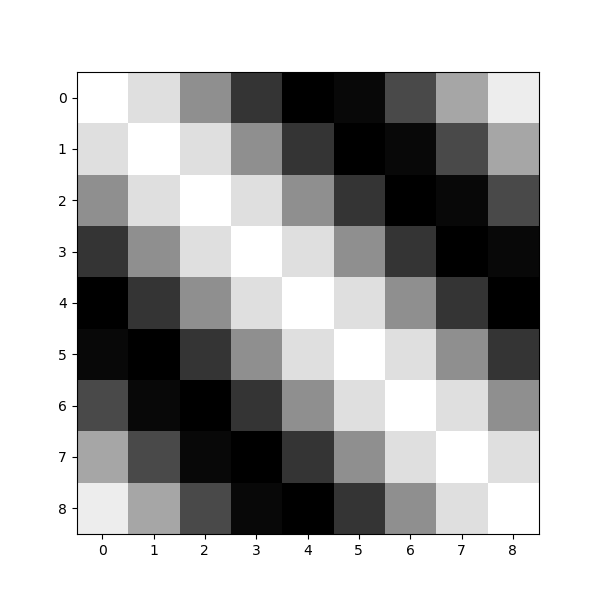

<IPython.core.display.Javascript object>


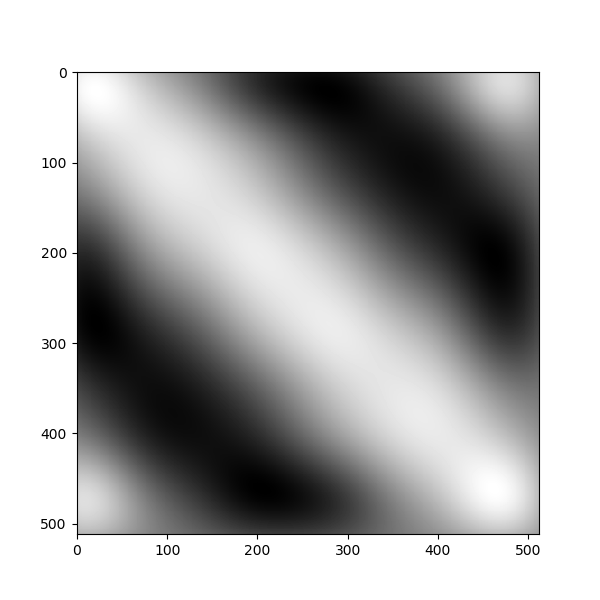

<IPython.core.display.Javascript object>


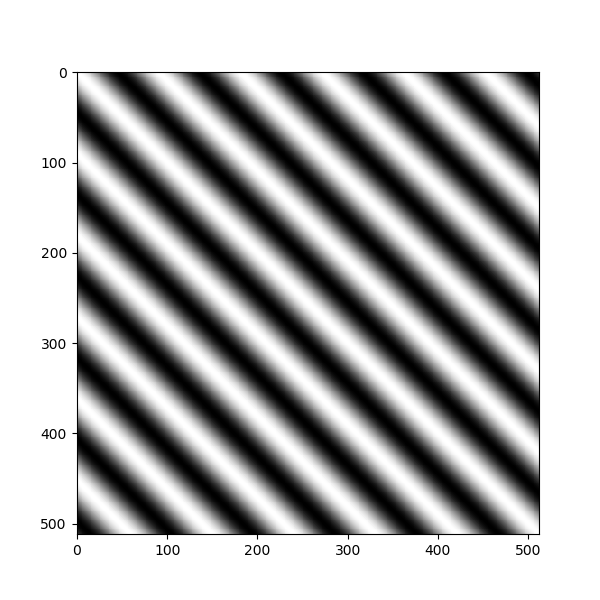

0.40655979142765397


In [9]:
fe = (3/2) * fm
Te = 1 / fe

s45_sampled_f0_bis=sinusoid2d(1, 45, 512, T0 , Te)
imshow(s45_sampled_f0_bis)

FT_s45_sampled_f0_bis = computeFT(s45_sampled_f0_bis)
FT_s45_sampled_f0_bis_module = toVisualizeFT(FT_s45_sampled_f0_bis)

xr = shannonInterpolation(s45_sampled_f0_bis, Te, 512)
xd = s45_sampled
imshow(xr)
imshow(xd)
print(error(xr,xd,1,512))

Plus l'aliasing est important, plus les fréquences moyennes et grandes sont mises en valeur. En effet, les petites fréquences sont enlevés et on perd du détail sur l'image, ce qui la rend flou.



5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

fm = f0 \* cos(theta) = (1/64) \* cos(10°) = (1/64) \* cos(pi/18)

<IPython.core.display.Javascript object>


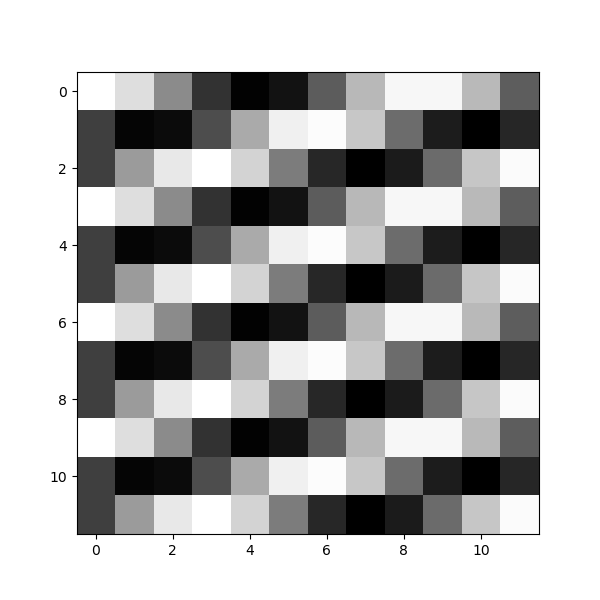

/home/vincent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


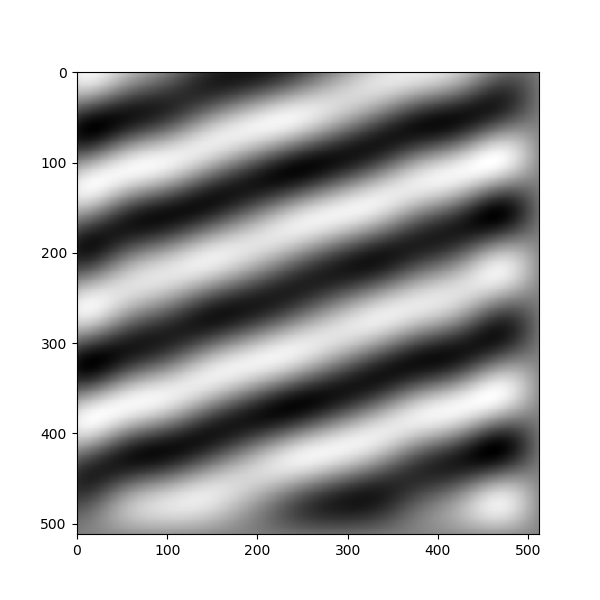

<IPython.core.display.Javascript object>


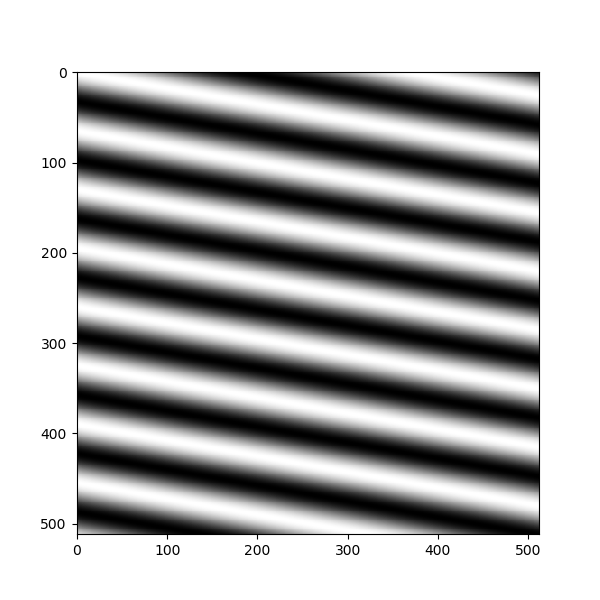

0.3982390747439338


In [10]:
fm = (1/64)*np.cos((np.pi/18))
fe = (3/2) * fm
Te = 1 / fe
# f0 = 4 * fm
# T0 = 1 / f0

s45_sampled_theta=sinusoid2d(1, 10, 512, 64 , Te)
test=sinusoid2d(1, 10, 512, 64, 1)

xr = shannonInterpolation(s45_sampled_theta, Te, 512)
xd = test
imshow(s45_sampled_theta)
imshow(xr)
imshow(xd)

print(error(xr,xd,1,512))

On observe que les images obtenues sont dans le sens inverse à l'original. Ceci est dû au fait que la condition de Shannon (fe > 2 \* fmax) n'est pas respectée. De ce fait, les signaux se superposent, ce qui engendre des interference. En effet, dans l'exemple suivant, on prend fe = 2.5 \* fmax et l'image est bien dans le bon sens.

/home/vincent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


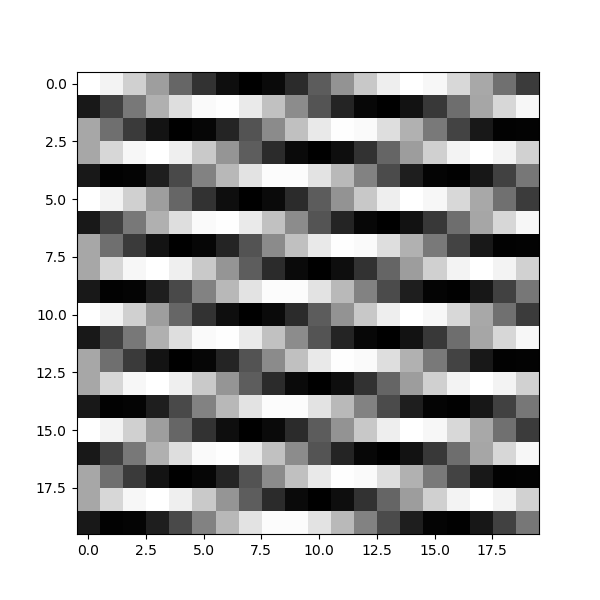

<IPython.core.display.Javascript object>


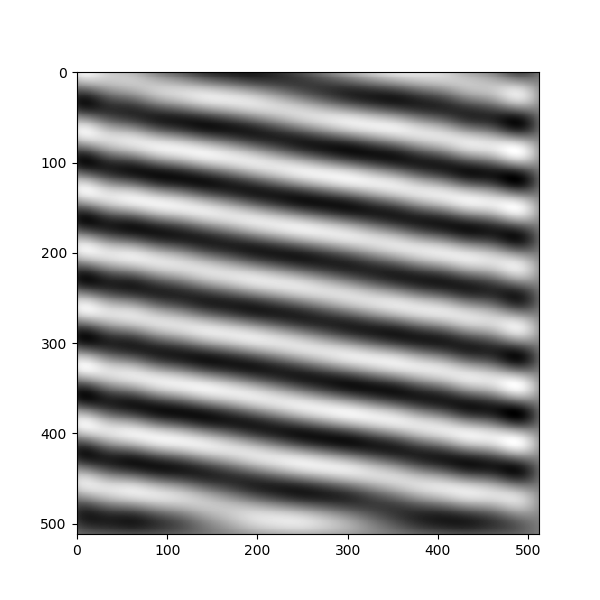

<IPython.core.display.Javascript object>


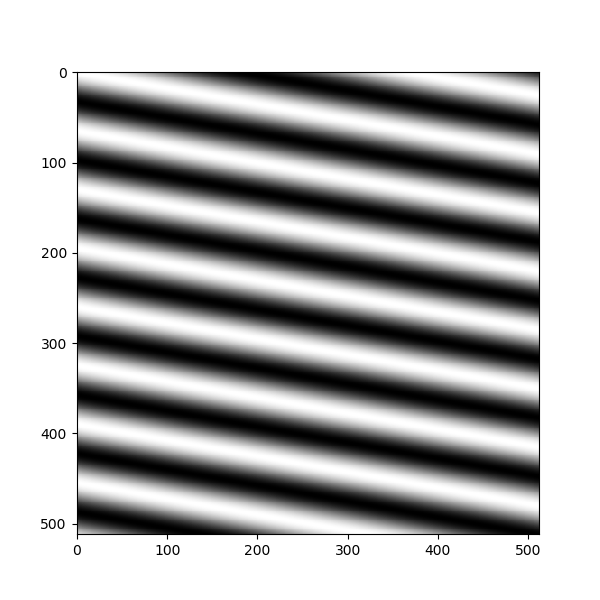

0.04024139853367949


In [11]:
fe = 2.5 * fm
Te = 1 / fe
# f0 = 4 * fm
# T0 = 1 / f0

s45_sampled_theta=sinusoid2d(1, 10, 512, 64 , Te)
test=sinusoid2d(1, 10, 512, 64, 1)

xr = shannonInterpolation(s45_sampled_theta, Te, 512)
xd = test
imshow(s45_sampled_theta)
imshow(xr)
imshow(xd)

print(error(xr,xd,1,512))

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [12]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [13]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

subSample2 parcourt l'ensemble de l'array I, conserve une case sur deux et retourne l'array obtenue.
Sur une image, cela signifie que l'on enlève un pixel sur deux.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

L'aliasing est un effet non souhaité ayant pour effet la pixélisation de l'image. C'est alors un inconvénient dans la mesure où cela rend l'image moins net.

/home/vincent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


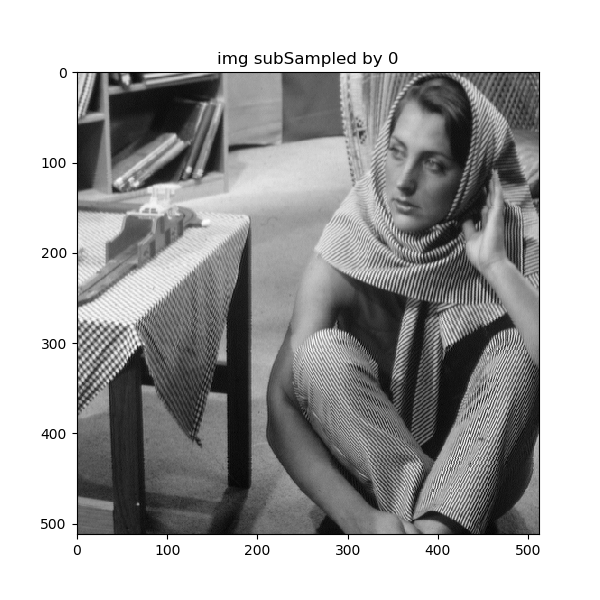

<IPython.core.display.Javascript object>


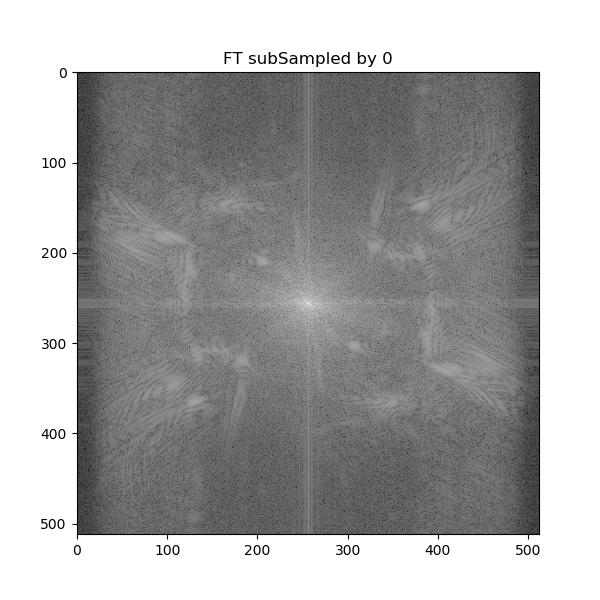

<IPython.core.display.Javascript object>


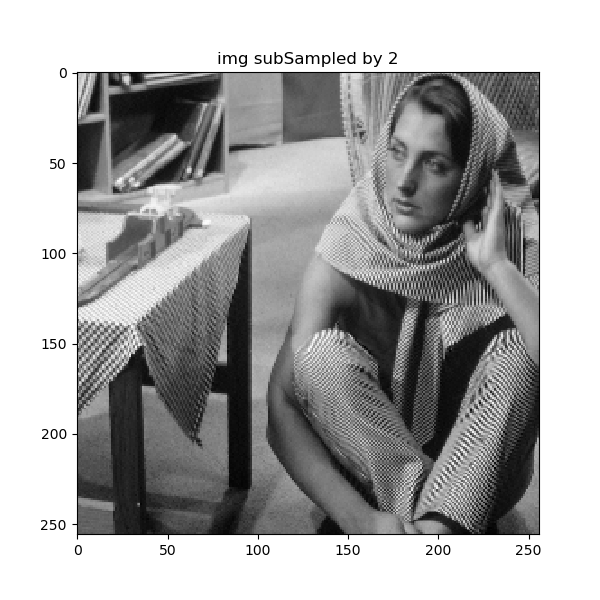

<IPython.core.display.Javascript object>


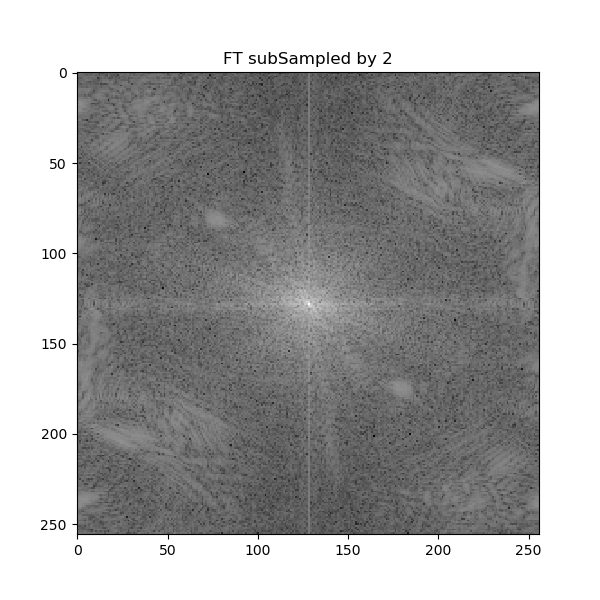

<IPython.core.display.Javascript object>


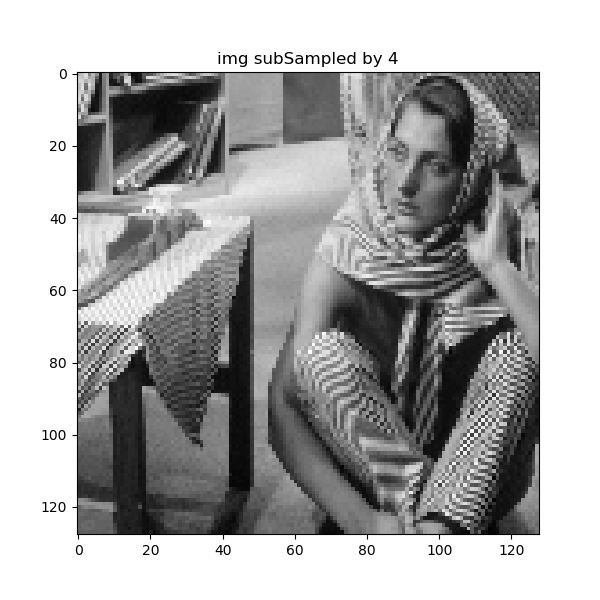

<IPython.core.display.Javascript object>


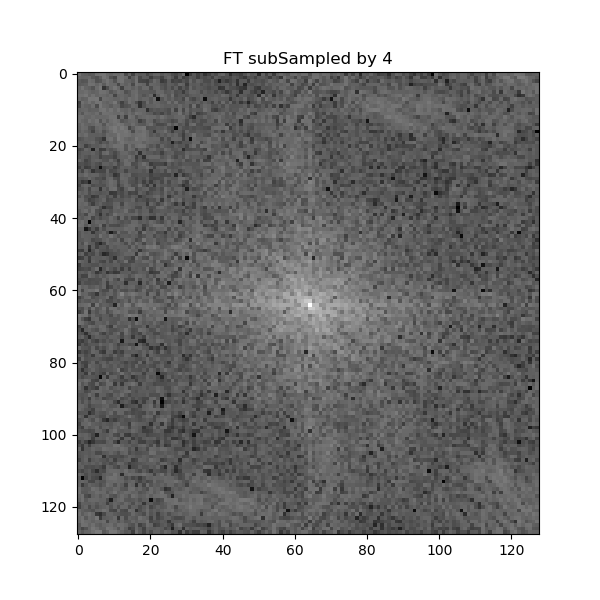

<IPython.core.display.Javascript object>


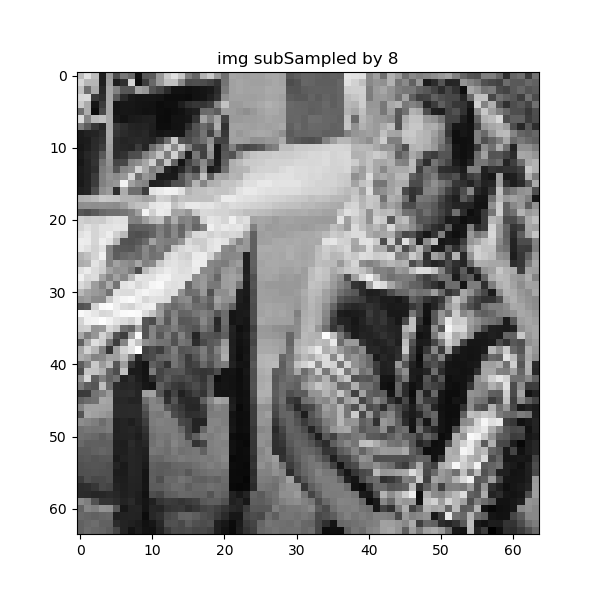

<IPython.core.display.Javascript object>


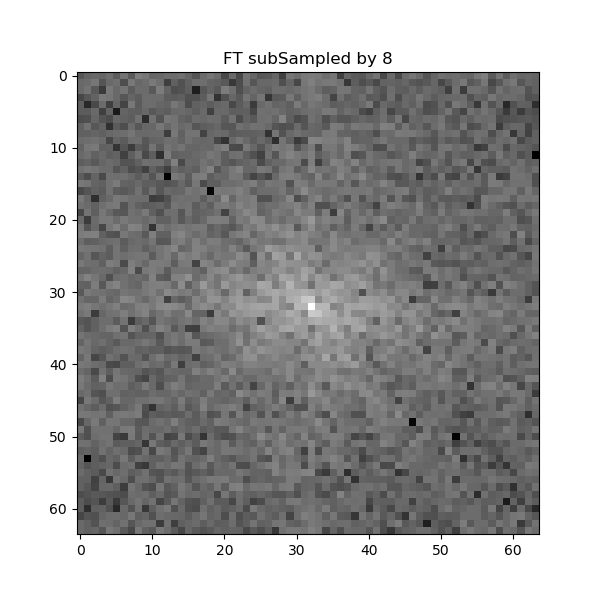

<IPython.core.display.Javascript object>


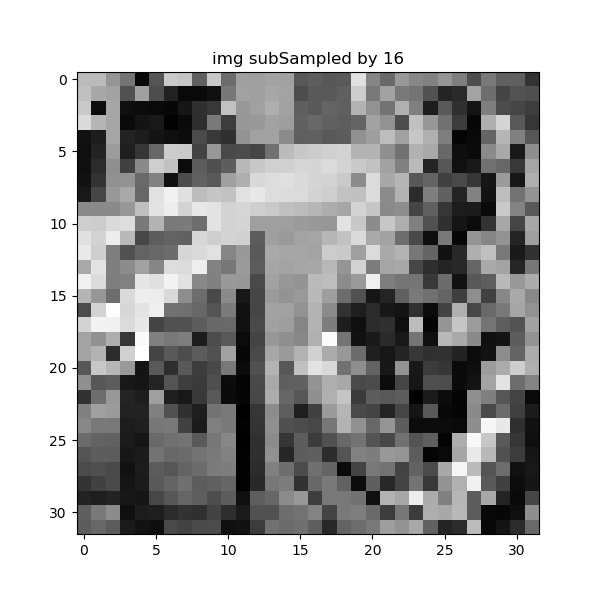

<IPython.core.display.Javascript object>


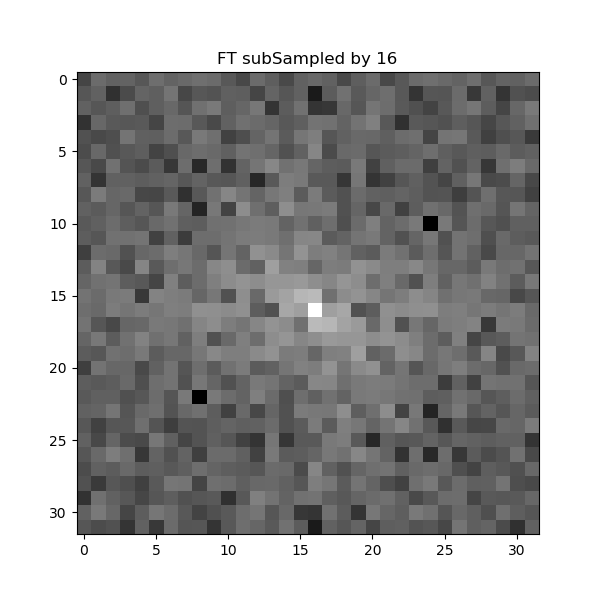

<IPython.core.display.Javascript object>


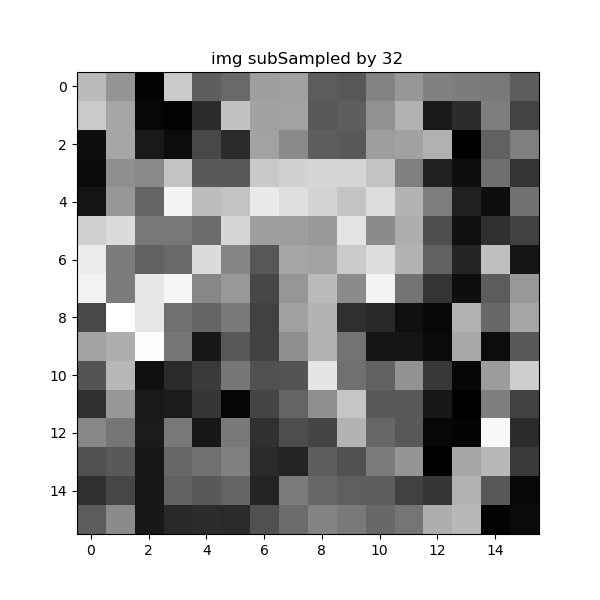

<IPython.core.display.Javascript object>


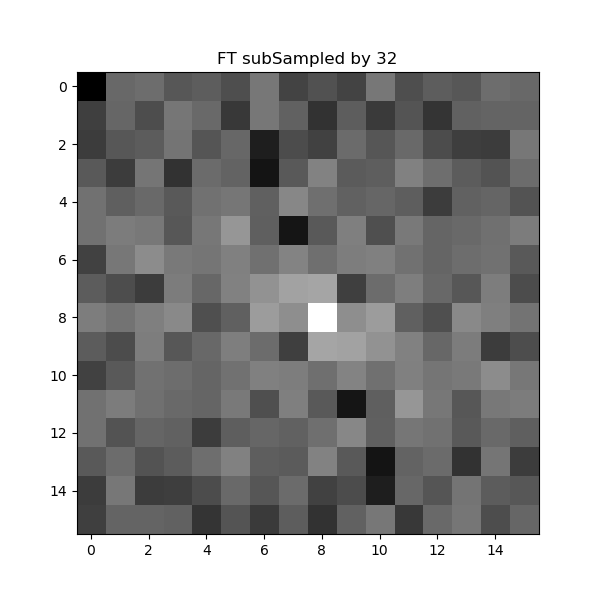

<IPython.core.display.Javascript object>


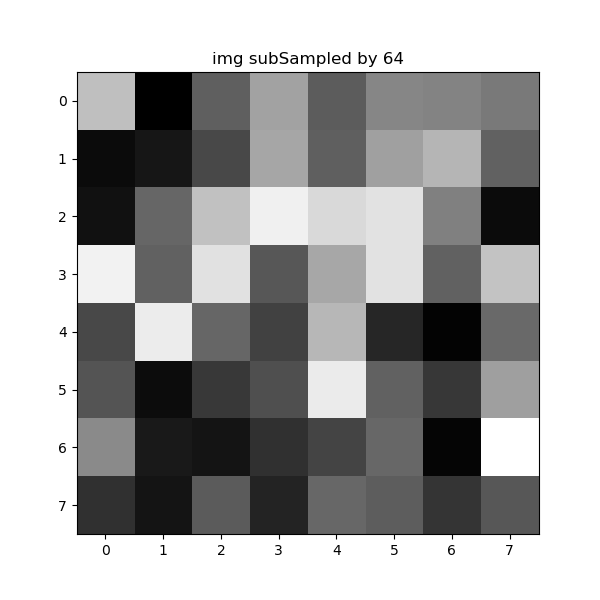

<IPython.core.display.Javascript object>


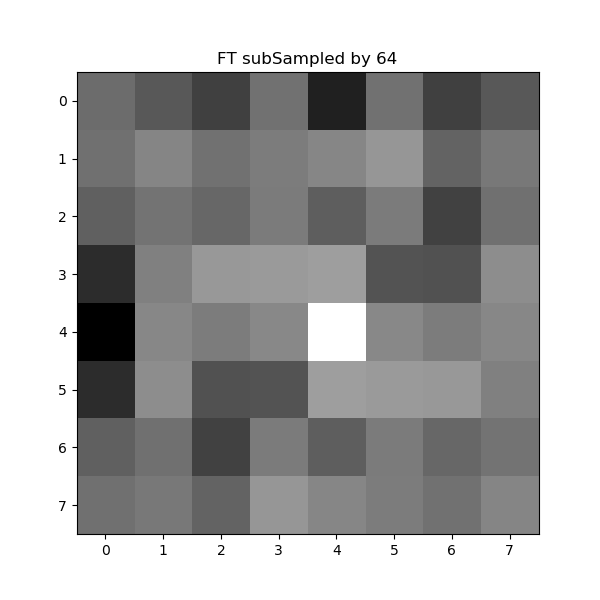

<IPython.core.display.Javascript object>


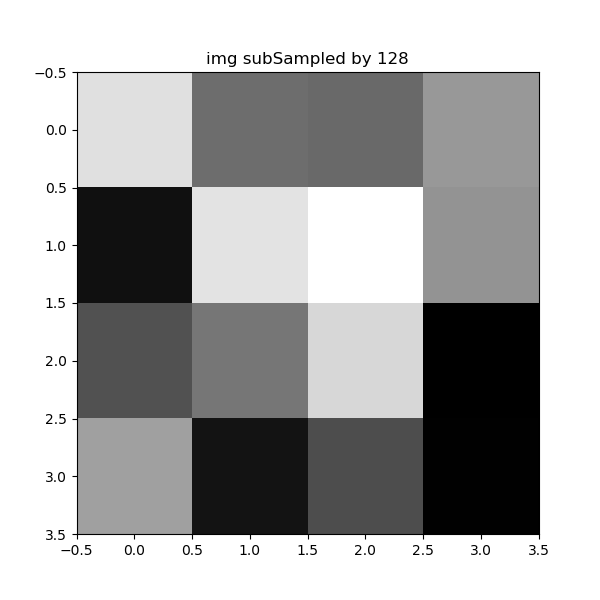

<IPython.core.display.Javascript object>


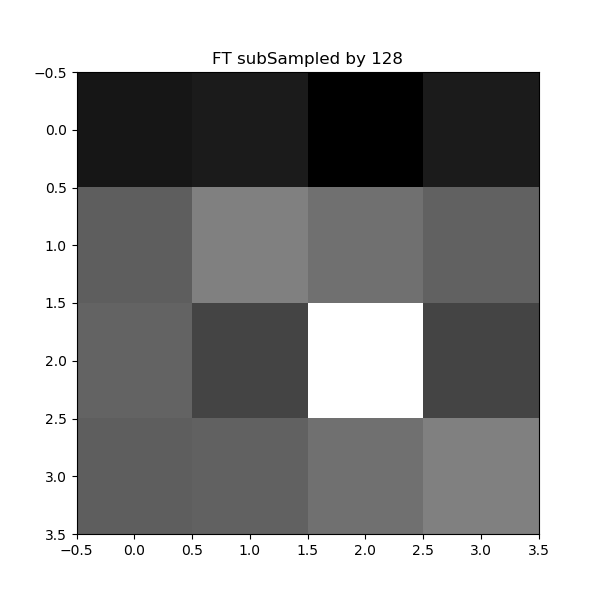

<IPython.core.display.Javascript object>


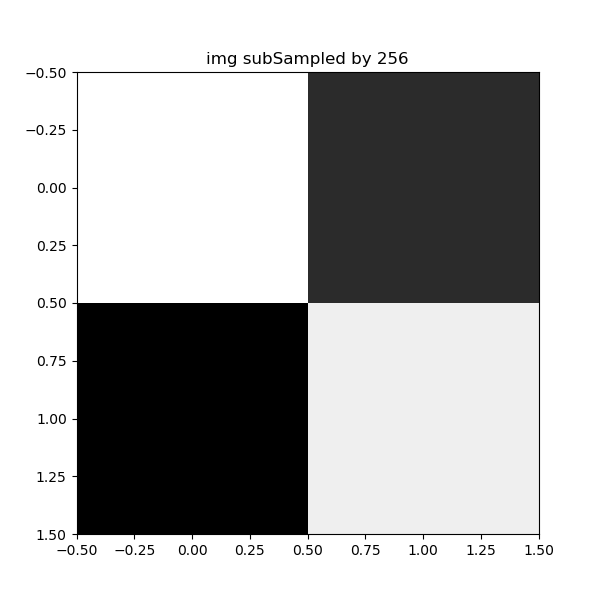

<IPython.core.display.Javascript object>


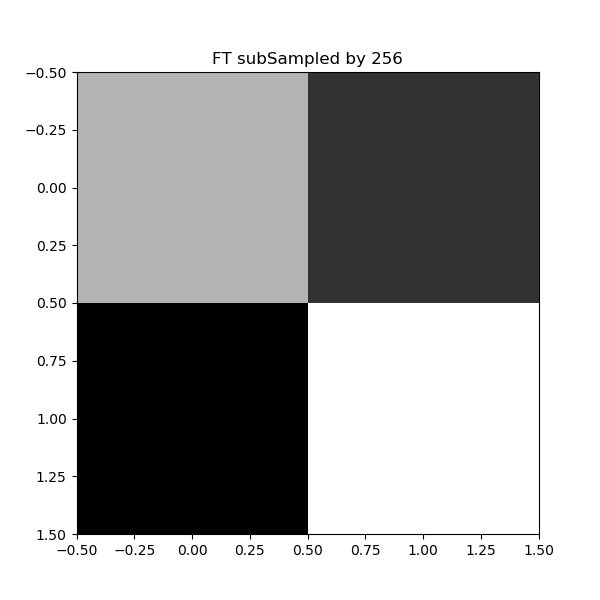

<IPython.core.display.Javascript object>


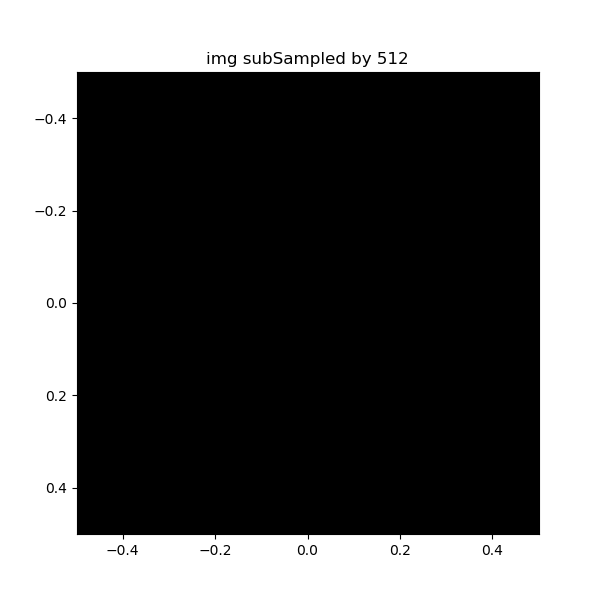

<IPython.core.display.Javascript object>


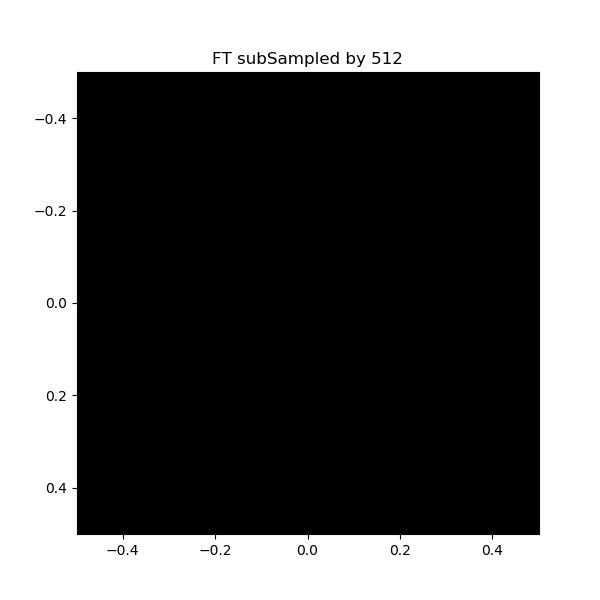

In [14]:

img = barbara.copy() # Pour bien partir de l'image initiale
FT_img = computeFT(img)
FT_module_img = toVisualizeLogFT(FT_img)
imshow(img, title = 'img subSampled by 0')
imshow(FT_module_img, title ='FT subSampled by 0')


for i in range(9): # Faire varier le nombre de boucle (à partir de 9, il n'y a qu'un pixel)
    img = subSample2(img)
    FT_img = computeFT(img)
    FT_module_img = toVisualizeLogFT(FT_img)
    imshow(img, title = ('img subSampled by ' + str(2**(i+1))))
    imshow(FT_module_img, title = ('FT subSampled by ' + str(2**(i+1))))
    
    

3. Bonus question: same question with the image `img/mandrill.png`.

In [15]:
mandrill = np.array(Image.open('img/mandrill.png'))

/home/vincent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


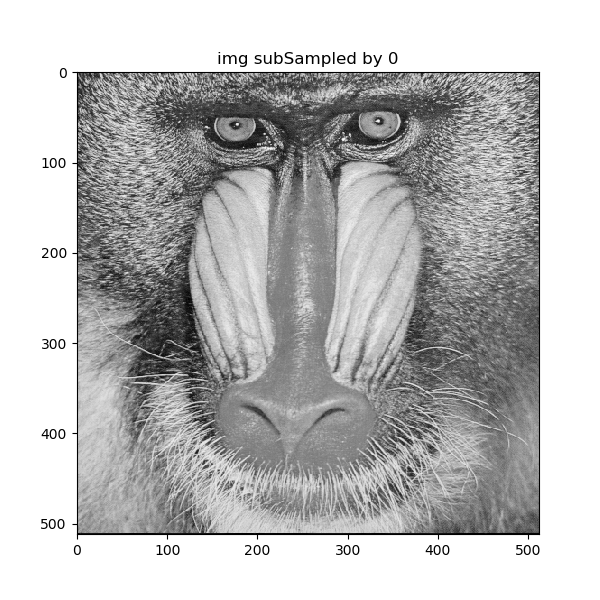

<IPython.core.display.Javascript object>


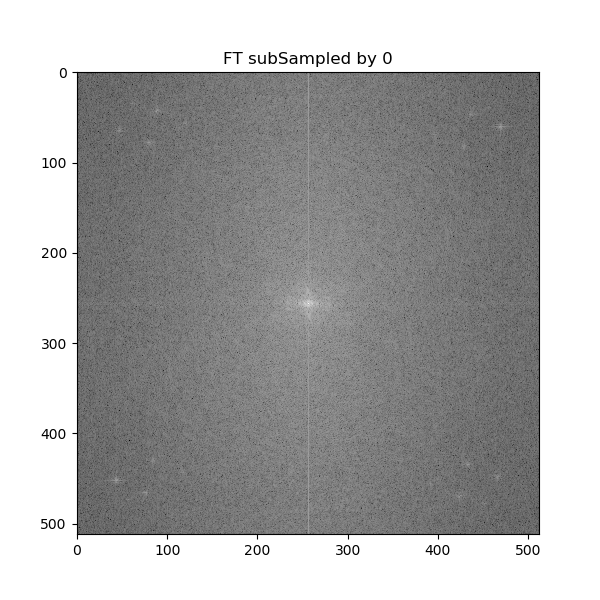

<IPython.core.display.Javascript object>


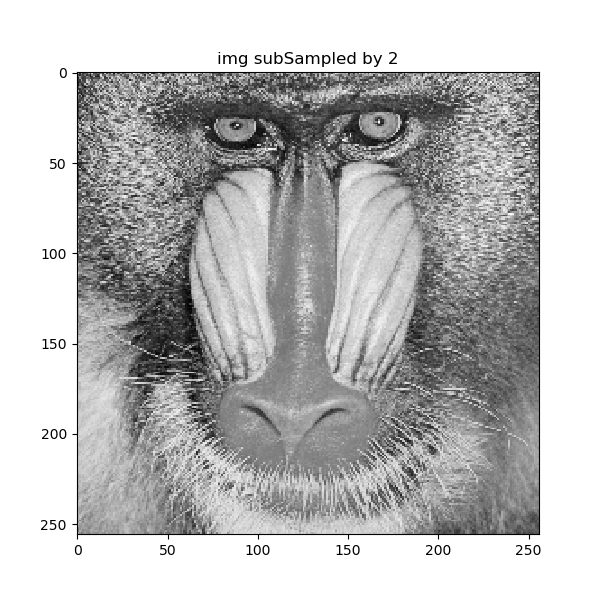

<IPython.core.display.Javascript object>


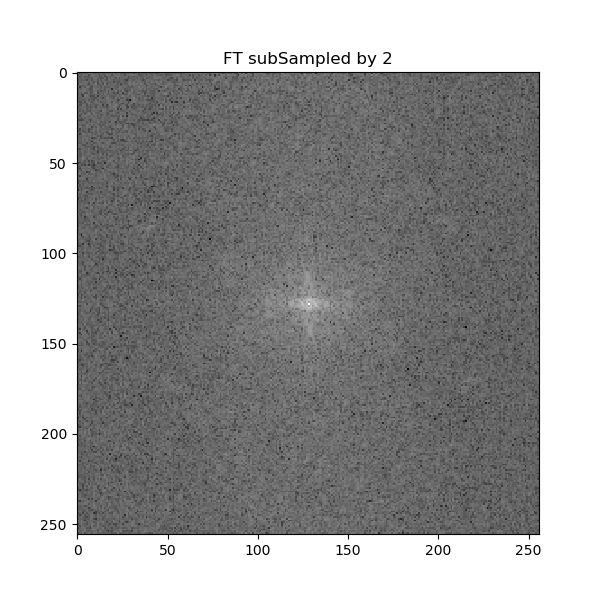

<IPython.core.display.Javascript object>


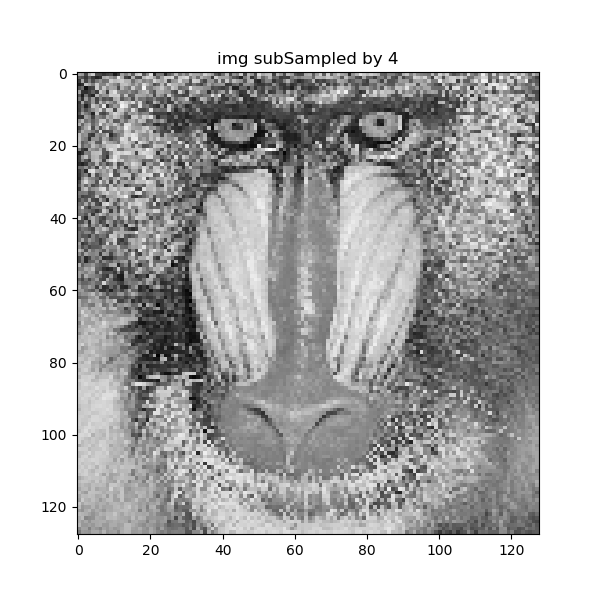

<IPython.core.display.Javascript object>


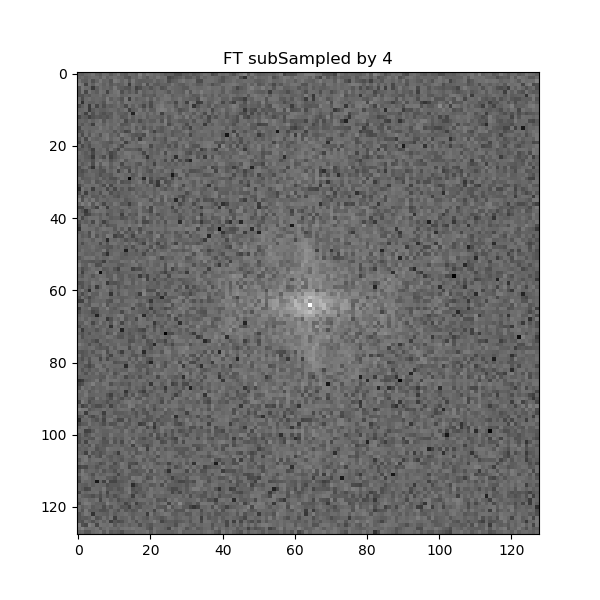

<IPython.core.display.Javascript object>


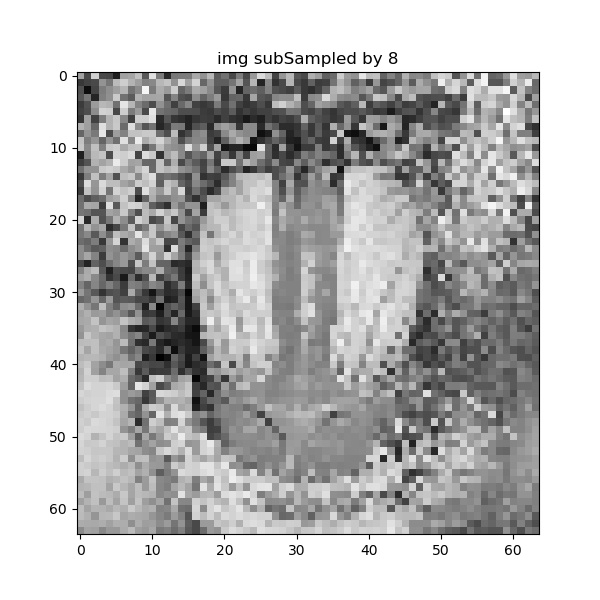

<IPython.core.display.Javascript object>


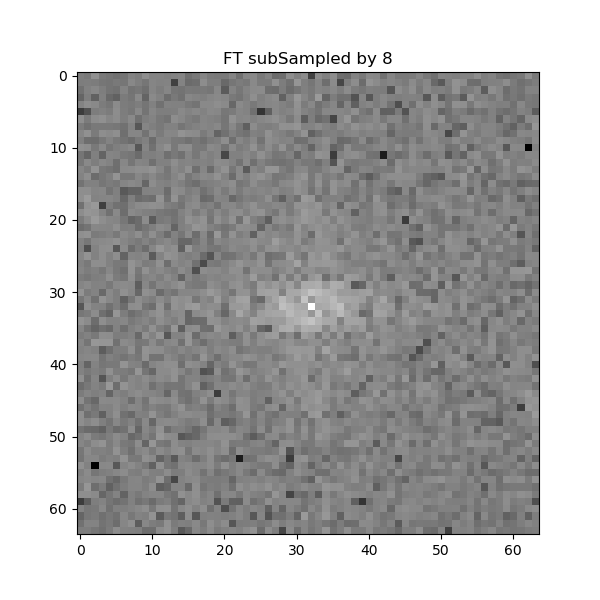

In [16]:
img = mandrill.copy() # Pour bien partir de l'image initiale
FT_img = computeFT(img)
FT_module_img = toVisualizeLogFT(FT_img)
imshow(img, title = 'img subSampled by 0')
imshow(FT_module_img, title ='FT subSampled by 0')


for i in range(3): # Faire varier le nombre de boucle
    img = subSample2(img)
    FT_img = computeFT(img)
    FT_module_img = toVisualizeLogFT(FT_img)
    imshow(img, title = ('img subSampled by ' + str(2**(i+1))))
    imshow(FT_module_img, title = ('FT subSampled by ' + str(2**(i+1))))
